In [116]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [20]:
df = pd.read_csv('/Users/phupha/Desktop/PJME_hourly.csv')
#set index
df = df.set_index('Datetime')
#make x-axis easier to read because index is out as date-time rather than string value
df.index = pd.to_datetime(df.index)

In [21]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [22]:
color_pal = sns.color_palette()

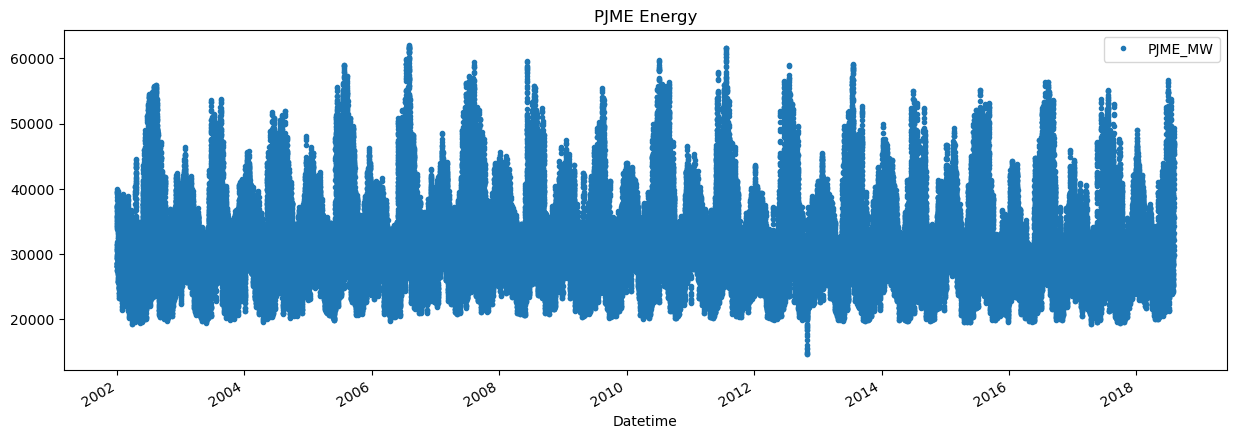

In [25]:
df.plot(style = '.', figsize=(15,5), color=color_pal[0], title='PJME Energy')
plt.show()

# Train/Test Split

In [28]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

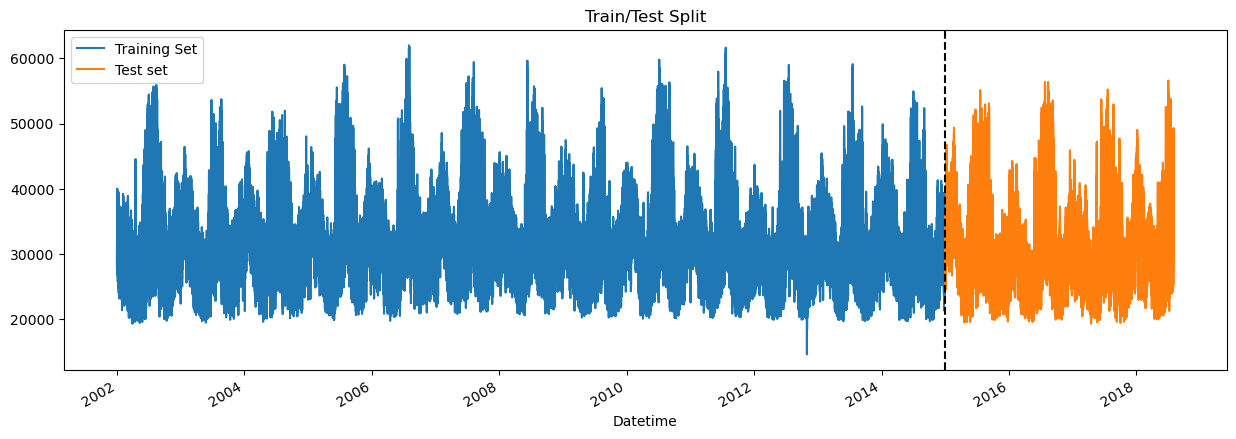

In [34]:
#plot to show test and train data in the same axis

#create the axis and plot
fig, ax = plt.subplots(figsize = (15, 5))

train.plot(ax=ax, label = 'Training dataset', title='Train/Test Split')
test.plot(ax=ax, label = 'Test dataset')

#make a line
ax.axvline('01-01-2015', color = 'black', ls='--')
ax.legend(['Training Set', 'Test set'])

plt.show()

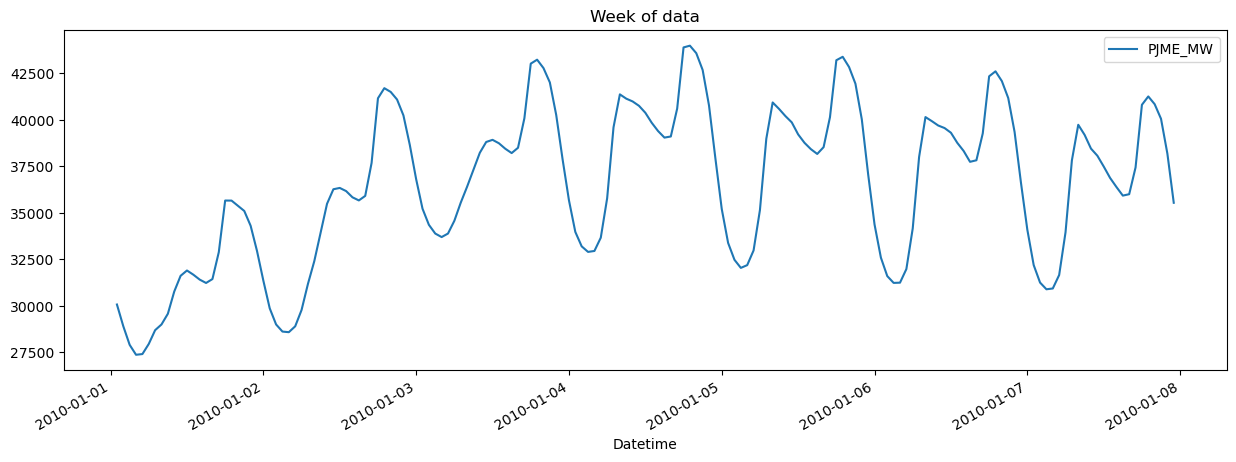

In [38]:
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize = (15,5), title = 'Week of data')
plt.show()

# Feature creation

In [74]:
#add another column called hour
#we can use this command because we change to date-time rather than string index pd.to_datetime(df.index)

def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day of week'] = df.index.day_of_week
    df['month'] = df.index.month
    df['quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    
    return df

df = create_features(df)

In [75]:
df

,PJME_MW,hour,day of week,month,year,dayofyear,quarter
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,2002,365,4
2002-12-31 02:00:00,25147.0,2,1,12,2002,365,4
2002-12-31 03:00:00,24574.0,3,1,12,2002,365,4
2002-12-31 04:00:00,24393.0,4,1,12,2002,365,4
2002-12-31 05:00:00,24860.0,5,1,12,2002,365,4
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,2018,1,1
2018-01-01 21:00:00,43751.0,21,0,1,2018,1,1
2018-01-01 22:00:00,42402.0,22,0,1,2018,1,1


# Visualize our feature/ target relationship

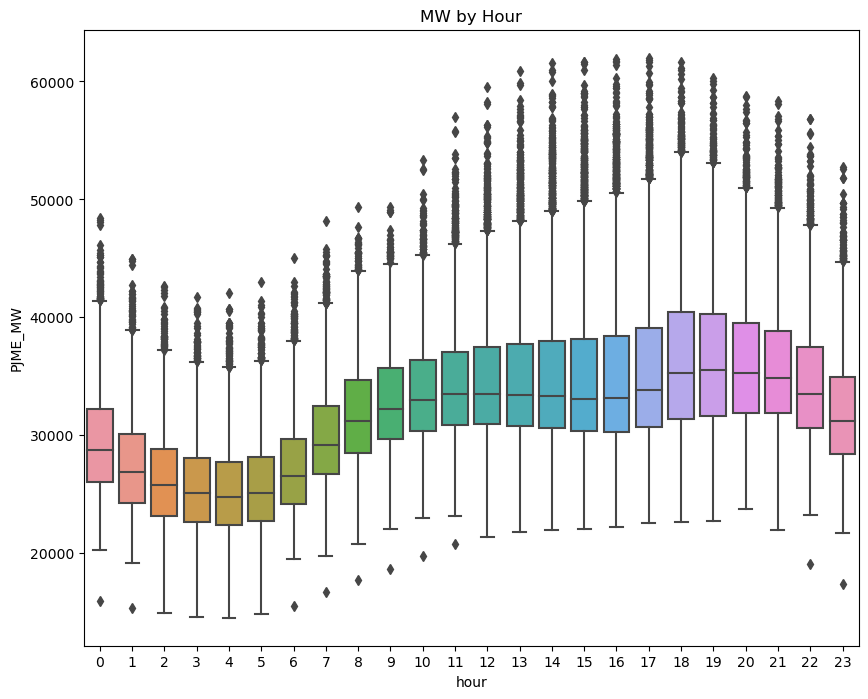

In [76]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW by Hour')
plt.show()

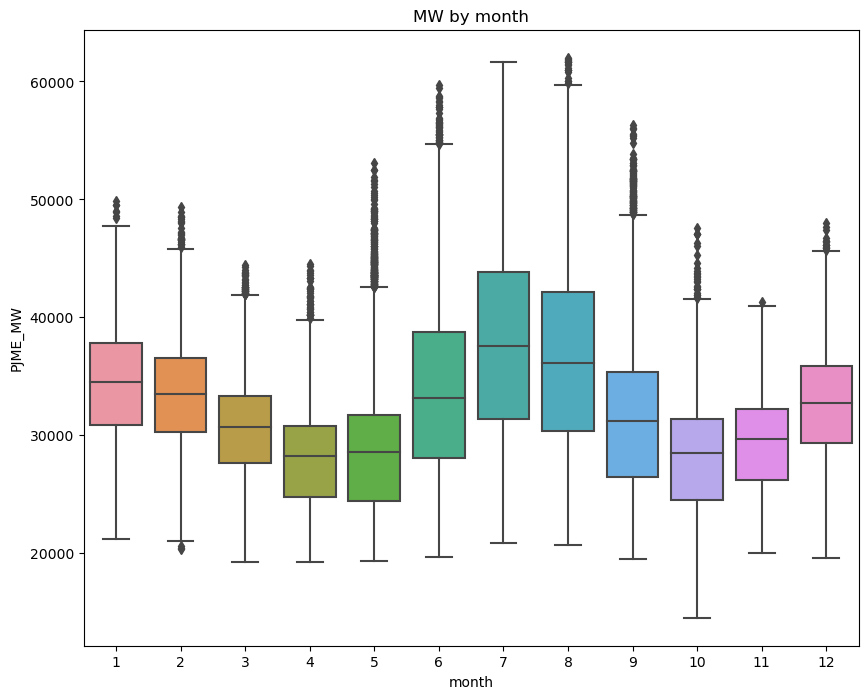

In [77]:
fig, ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x='month', y='PJME_MW')
ax.set_title('MW by month')
plt.show()

# create model

In [78]:
#create training dataset
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'day of week', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'

In [79]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


In [83]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds = 50, learning_rate = 0.01)
reg.fit(X_train, y_train,
       eval_set = [(X_train, y_train),(X_test, y_test)],
       verbose = True)



[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[1]	validation_0-rmse:32279.88735	validation_1-rmse:31332.60350
[2]	validation_0-rmse:31961.14360	validation_1-rmse:31014.27357
[3]	validation_0-rmse:31645.62525	validation_1-rmse:30699.10021
[4]	validation_0-rmse:31333.30788	validation_1-rmse:30385.92606
[5]	validation_0-rmse:31024.14316	validation_1-rmse:30075.82644
[6]	validation_0-rmse:30718.10796	validation_1-rmse:29769.05547
[7]	validation_0-rmse:30415.17979	validation_1-rmse:29465.13991
[8]	validation_0-rmse:30115.31200	validation_1-rmse:29164.62813
[9]	validation_0-rmse:29818.48171	validation_1-rmse:28866.85195
[10]	validation_0-rmse:29524.66621	validation_1-rmse:28571.74321
[11]	validation_0-rmse:29233.82326	validation_1-rmse:28280.36822
[12]	validation_0-rmse:28945.84624	validation_1-rmse:27991.28725
[13]	validation_0-rmse:28660.79477	validation_1-rmse:27705.25177
[14]	validation_0-rmse:28378.63482	validation_1-rmse:27422.93837
[15]	validation_0-rmse:28099.33236	

[127]	validation_0-rmse:9639.34517	validation_1-rmse:8943.22685
[128]	validation_0-rmse:9553.83381	validation_1-rmse:8860.74829
[129]	validation_0-rmse:9468.90731	validation_1-rmse:8783.77605
[130]	validation_0-rmse:9385.18620	validation_1-rmse:8702.78904
[131]	validation_0-rmse:9302.13036	validation_1-rmse:8628.24670
[132]	validation_0-rmse:9219.96985	validation_1-rmse:8553.50065
[133]	validation_0-rmse:9139.05976	validation_1-rmse:8475.63618
[134]	validation_0-rmse:9058.77815	validation_1-rmse:8401.78999
[135]	validation_0-rmse:8979.33354	validation_1-rmse:8329.68884
[136]	validation_0-rmse:8900.82328	validation_1-rmse:8257.61035
[137]	validation_0-rmse:8823.16493	validation_1-rmse:8187.47943
[138]	validation_0-rmse:8746.40369	validation_1-rmse:8117.30033
[139]	validation_0-rmse:8670.69319	validation_1-rmse:8044.94586
[140]	validation_0-rmse:8595.30150	validation_1-rmse:7974.50892
[141]	validation_0-rmse:8521.03848	validation_1-rmse:7903.61734
[142]	validation_0-rmse:8447.53338	valid

[256]	validation_0-rmse:3927.56280	validation_1-rmse:4126.40487
[257]	validation_0-rmse:3909.69820	validation_1-rmse:4116.66382
[258]	validation_0-rmse:3893.02728	validation_1-rmse:4105.37452
[259]	validation_0-rmse:3877.19328	validation_1-rmse:4095.87654
[260]	validation_0-rmse:3860.91496	validation_1-rmse:4086.11364
[261]	validation_0-rmse:3844.68215	validation_1-rmse:4075.07671
[262]	validation_0-rmse:3829.43135	validation_1-rmse:4066.33859
[263]	validation_0-rmse:3813.64350	validation_1-rmse:4056.79027
[264]	validation_0-rmse:3798.97077	validation_1-rmse:4048.14058
[265]	validation_0-rmse:3782.79682	validation_1-rmse:4039.45958
[266]	validation_0-rmse:3767.96005	validation_1-rmse:4030.05158
[267]	validation_0-rmse:3753.73564	validation_1-rmse:4021.88378
[268]	validation_0-rmse:3739.05516	validation_1-rmse:4013.20004
[269]	validation_0-rmse:3724.68055	validation_1-rmse:4004.95299
[270]	validation_0-rmse:3710.68657	validation_1-rmse:3995.70681
[271]	validation_0-rmse:3696.70657	valid

[385]	validation_0-rmse:2930.45197	validation_1-rmse:3717.54549
[386]	validation_0-rmse:2928.40947	validation_1-rmse:3716.98411
[387]	validation_0-rmse:2924.75154	validation_1-rmse:3717.23919
[388]	validation_0-rmse:2922.74662	validation_1-rmse:3716.75390
[389]	validation_0-rmse:2918.65801	validation_1-rmse:3717.04523
[390]	validation_0-rmse:2914.96604	validation_1-rmse:3717.22400
[391]	validation_0-rmse:2913.07012	validation_1-rmse:3716.73675
[392]	validation_0-rmse:2909.27608	validation_1-rmse:3717.36197
[393]	validation_0-rmse:2906.62094	validation_1-rmse:3717.37200
[394]	validation_0-rmse:2903.57242	validation_1-rmse:3717.49762
[395]	validation_0-rmse:2900.99520	validation_1-rmse:3717.56557
[396]	validation_0-rmse:2896.24892	validation_1-rmse:3716.95968
[397]	validation_0-rmse:2894.50112	validation_1-rmse:3716.66088
[398]	validation_0-rmse:2889.88620	validation_1-rmse:3716.12758
[399]	validation_0-rmse:2887.30360	validation_1-rmse:3716.23487
[400]	validation_0-rmse:2884.85132	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# Feature importance

In [84]:
#how much each features were used in each of the reg

reg.feature_importances_

array([0.44880438, 0.1586678 , 0.03331862, 0.22815645, 0.02263376,
       0.10841895], dtype=float32)

In [88]:
#make panda data frame so that it is easier to read/undertand

fi = pd.DataFrame(data=reg.feature_importances_,
            index = reg.feature_names_in_,
            columns = ['importance'])

In [93]:
fi

,importance
hour,0.448804
day of week,0.158668
quarter,0.033319
month,0.228156
year,0.022634
dayofyear,0.108419


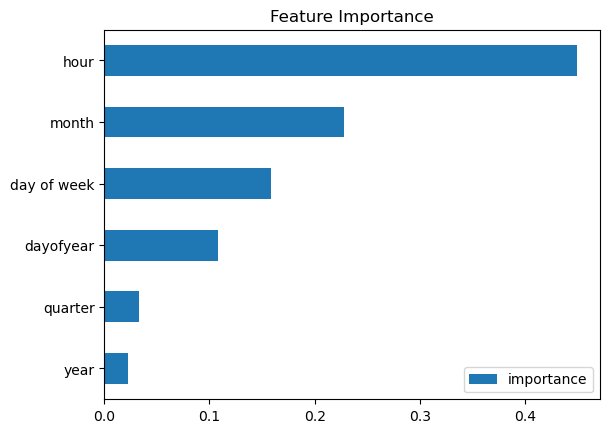

In [91]:
#plot and sort value depency on importances
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [101]:
#create new column fo prediction value

test['prediction'] = reg.predict(X_test)

In [109]:
#merge prediction with the data frame
df = df.merge(test['prediction'], how='left', left_index=True, right_index=True)

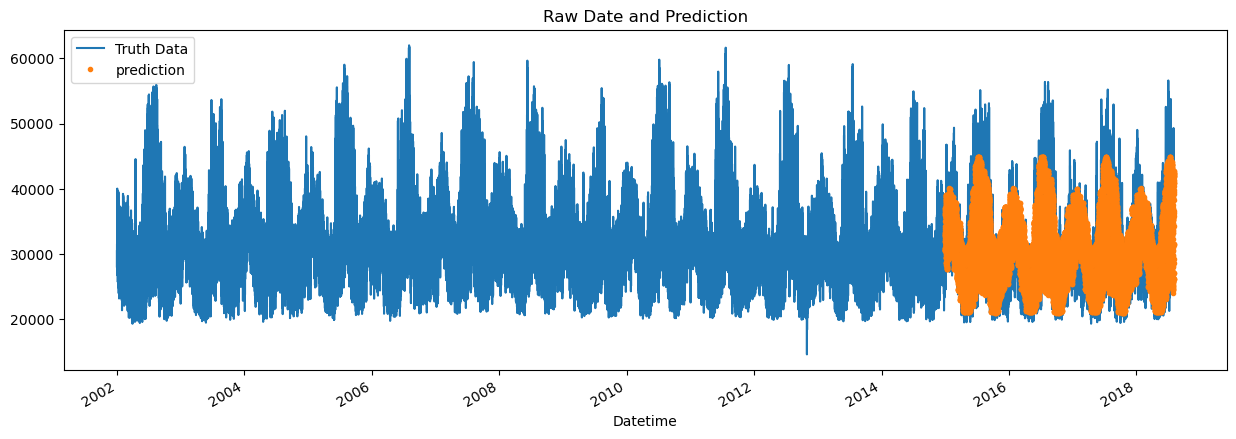

In [110]:
#plot the data to show
ax = df['PJME_MW'].plot(figsize=(15,5))

df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'prediction'])
ax.set_title('Raw Date and Prediction')
plt.show()


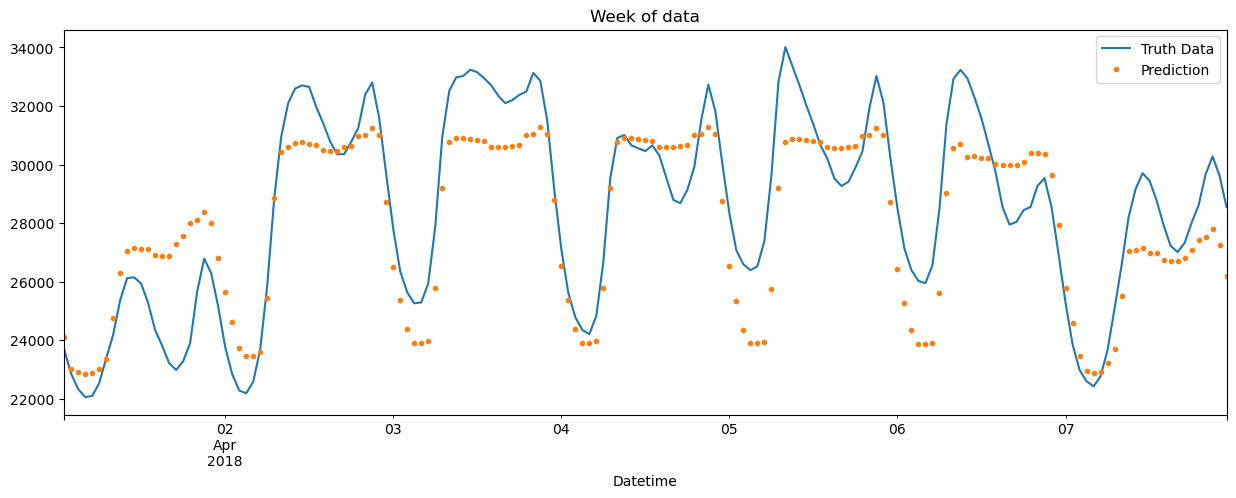

In [114]:
#one week of prediction
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['PJME_MW']\
    .plot(figsize = (15,5), title = 'Week of data')

df.loc[(df.index>'04-01-2018')&(df.index < '04-08-2018')]['prediction']\
    .plot(style='.')

plt.legend(['Truth Data','Prediction'])

plt.show()

In [118]:
score = py.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))

In [120]:
#4 decimal points
print(f'mean squared error is: {score:0.2f}')

mean squared error is: 3715.93


# Calculated error

In [125]:
test['error'] = py.abs(test[TARGET] - test['prediction'])

In [127]:
test['date'] = test.index.date

In [134]:
test.groupby('date')['error'].mean().sort_values(ascending=True).head(10)

date
2016-04-04    389.607829
2016-09-27    396.752116
2015-03-10    456.506510
2016-05-01    465.372640
2016-12-08    494.141764
2015-09-25    502.371094
2015-10-28    507.922445
2017-05-02    514.495768
2017-06-16    524.565267
2017-12-08    527.530436
Name: error, dtype: float64